In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats.stats as stats
import collections
import warnings; warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import stat

In [ ]:
df = pd.read_csv('D2C_pull2.xlsx - D2C_pull2.csv')
df.head()

,houshold,brand_car,age_car_yr,Sum_Totprem_Auto,Cars,salard_Age_cus_HH,cus_tenure_mth,HH_tenure_mth,FA_DCT,Fc,FD,cs_flag_auto,zone,salary,rural_urban,fraud_Ind
0,1,1,13,0.0,1,49,142,189,0,2,3,0,4,2693216,0,0
1,2,7,3,0.0,4,26,211,161,1,2,4,0,2,4384950,0,0
2,3,3,2,0.0,1,42,314,329,0,1,2,0,4,3089138,1,0
3,4,2,10,0.0,2,51,47,97,1,1,3,0,4,4295953,1,0
4,5,1,34,0.0,2,26,119,109,0,2,3,0,4,1317179,0,0


In [ ]:
df.tail()

,houshold,brand_car,age_car_yr,Sum_Totprem_Auto,Cars,salard_Age_cus_HH,cus_tenure_mth,HH_tenure_mth,FA_DCT,Fc,FD,cs_flag_auto,zone,salary,rural_urban,fraud_Ind
8875,8876,7,1,0.0,2,39,58,73,0,1,1,0,1,1668770,0,0
8876,8877,7,22,0.0,2,33,189,202,0,1,3,0,1,1372083,0,0
8877,8878,7,14,0.0,1,35,173,158,0,3,1,0,1,1445592,0,0
8878,8879,4,7,0.0,1,46,7,12,0,3,2,0,1,2429949,1,0
8879,8880,1,7,0.0,4,40,146,122,2,1,1,0,6,1367223,1,0


In [ ]:
df.shape

(8880, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   houshold           8880 non-null   int64  
 1   brand_car          8880 non-null   int64  
 2   age_car_yr         8880 non-null   int64  
 3   Sum_Totprem_Auto   8880 non-null   float64
 4   Cars               8880 non-null   int64  
 5   salard_Age_cus_HH  8880 non-null   int64  
 6   cus_tenure_mth     8880 non-null   int64  
 7   HH_tenure_mth      8880 non-null   int64  
 8   FA_DCT             8880 non-null   int64  
 9   Fc                 8880 non-null   int64  
 10  FD                 8880 non-null   int64  
 11  cs_flag_auto       8880 non-null   int64  
 12  zone               8880 non-null   int64  
 13  salary             8880 non-null   int64  
 14  rural_urban        8880 non-null   int64  
 15  fraud_Ind          8880 non-null   int64  
dtypes: float64(1), int64(15)

In [ ]:
df.columns

Index(['houshold', 'brand_car', 'age_car_yr', 'Sum_Totprem_Auto', 'Cars',
       'salard_Age_cus_HH', 'cus_tenure_mth', 'HH_tenure_mth', 'FA_DCT', 'Fc',
       'FD', 'cs_flag_auto', 'zone', 'salary', 'rural_urban', 'fraud_Ind'],
      dtype='object')

In [ ]:
df.describe()

,houshold,brand_car,age_car_yr,Sum_Totprem_Auto,Cars,salard_Age_cus_HH,cus_tenure_mth,HH_tenure_mth,FA_DCT,Fc,FD,cs_flag_auto,zone,salary,rural_urban,fraud_Ind
count,8880.000000,8880.00000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8.880000e+03,8880.000000,8880.000000
mean,4440.500000,2.92973,12.048311,5787.717626,1.889189,37.072185,157.094932,186.257545,0.207207,2.321059,2.321059,0.128716,3.134347,3.006802e+06,0.207095,0.000676
std,2563.579529,2.08195,8.322616,21405.345175,1.011977,8.253493,91.138546,93.667195,0.405606,1.252530,1.252530,0.334904,1.539169,9.842636e+05,0.405247,0.025986
min,1.000000,1.00000,1.000000,0.000000,1.000000,25.000000,1.000000,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.301010e+06,0.000000,0.000000
25%,2220.750000,1.00000,6.000000,0.000000,1.000000,30.000000,84.000000,114.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.148496e+06,0.000000,0.000000
50%,4440.500000,2.00000,10.000000,0.000000,2.000000,37.000000,158.000000,188.000000,0.000000,2.000000,2.000000,0.000000,3.000000,3.007328e+06,0.000000,0.000000
75%,6660.250000,4.00000,17.000000,0.000000,2.000000,44.000000,232.000000,263.000000,0.000000,3.000000,3.000000,0.000000,4.000000,3.867612e+06,0.000000,0.000000
max,8880.000000,7.00000,43.000000,284100.600000,6.000000,51.000000,347.000000,360.000000,2.000000,6.000000,6.000000,1.000000,8.000000,4.701073e+06,1.000000,1.000000


In [ ]:
df.isnull().sum()

houshold             0
brand_car            0
age_car_yr           0
Sum_Totprem_Auto     0
Cars                 0
salard_Age_cus_HH    0
cus_tenure_mth       0
HH_tenure_mth        0
FA_DCT               0
Fc                   0
FD                   0
cs_flag_auto         0
zone                 0
salary               0
rural_urban          0
fraud_Ind            0
dtype: int64

In [ ]:
print(df['cs_flag_auto'].value_counts())
print(df['brand_car'].value_counts())
print(df['Cars'].value_counts())
print(df['Fc'].value_counts())
print(df['FD'].value_counts())
print(df['zone'].value_counts())
print(df['rural_urban'].value_counts())

0    7737
1    1143
Name: cs_flag_auto, dtype: int64
2    2770
1    2463
7    1540
3    1372
4     559
5     175
6       1
Name: brand_car, dtype: int64
1    4003
2    2770
3    1372
4     559
5     175
6       1
Name: Cars, dtype: int64
2    3039
1    2615
3    1838
4     826
6     290
5     272
Name: Fc, dtype: int64
2    3039
1    2615
3    1838
4     826
6     290
5     272
Name: FD, dtype: int64
3    2171
4    2090
1    1833
2    1185
5    1024
6     439
7     101
8      37
Name: zone, dtype: int64
0    7041
1    1839
Name: rural_urban, dtype: int64


0    87.128378
1    12.871622
Name: cs_flag_auto, dtype: float64


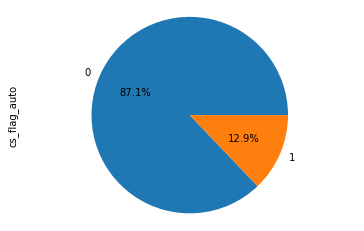

In [ ]:
print(df['cs_flag_auto'].value_counts(normalize=True) * 100)
df['cs_flag_auto'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')
plt.show()

2    31.193694
1    27.736486
7    17.342342
3    15.450450
4     6.295045
5     1.970721
6     0.011261
Name: brand_car, dtype: float64
Plot of brand_car


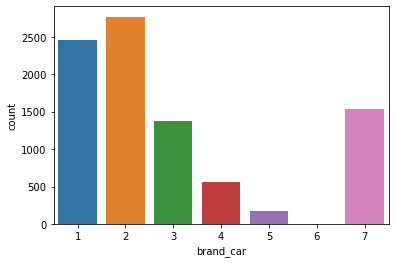

In [ ]:
print(df['brand_car'].value_counts(normalize=True) * 100)
sns.countplot(df['brand_car'])
print("Plot of brand_car")

1    45.078829
2    31.193694
3    15.450450
4     6.295045
5     1.970721
6     0.011261
Name: Cars, dtype: float64
Plot of Cars


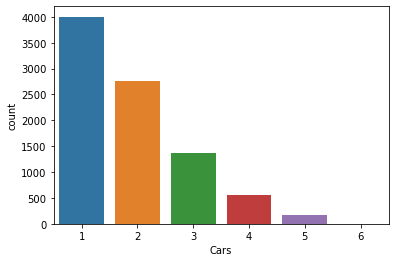

In [ ]:
print(df['Cars'].value_counts(normalize=True) * 100)
sns.countplot(df['Cars'])
print("Plot of Cars")

3    24.448198
4    23.536036
1    20.641892
2    13.344595
5    11.531532
6     4.943694
7     1.137387
8     0.416667
Name: zone, dtype: float64
Plot of zone


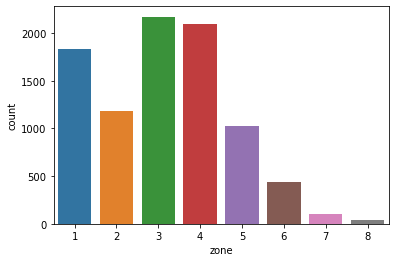

In [ ]:
print(df['zone'].value_counts(normalize=True) * 100)
sns.countplot(df['zone'])
print("Plot of zone")

0    79.290541
1    20.709459
Name: rural_urban, dtype: float64
Plot of rural_urban


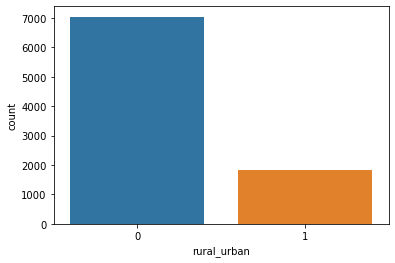

In [ ]:
print(df['rural_urban'].value_counts(normalize=True) * 100)
sns.countplot(df['rural_urban'])
print("Plot of rural_urban")

0    8874
1       6
Name: fraud_Ind, dtype: int64
We observed that fraud occurs by policy holder


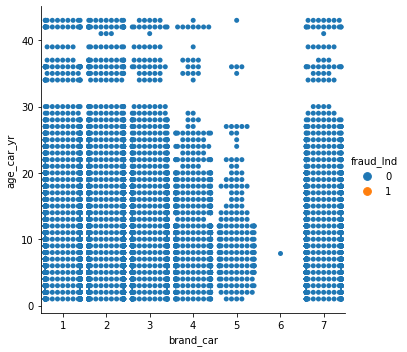

In [ ]:
print(df['fraud_Ind'].value_counts())
sns.catplot(x="brand_car", y="age_car_yr", hue="fraud_Ind", kind="swarm", data=df)
print("We observed that fraud occurs by policy holder")

In [ ]:
pd.crosstab(df['cs_flag_auto'],df['zone'])

zone,1,2,3,4,5,6,7,8
cs_flag_auto,,,,,,,,
0,1570,1070,1906,1804,894,388,77,28
1,263,115,265,286,130,51,24,9


[Text(0.5, 1.0, 'cs_flag_auto vs zone')]

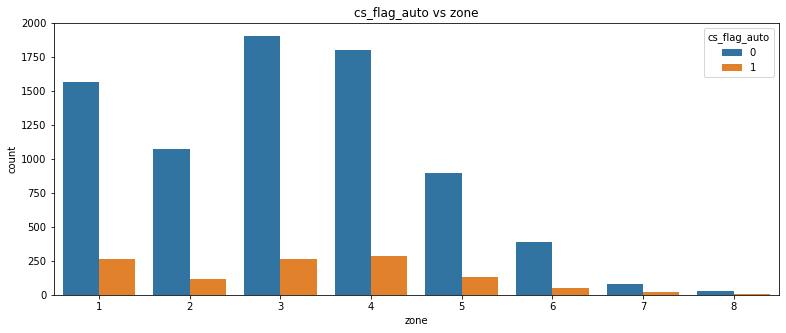

In [ ]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='zone',hue='cs_flag_auto',data=df)

ax.set(title="cs_flag_auto vs zone")

brand_car        1     2     3    4    5  6     7
cs_flag_auto                                     
0             2133  2409  1197  483  152  1  1362
1              330   361   175   76   23  0   178


[Text(0.5, 1.0, 'cs_flag_auto vs brand_car')]

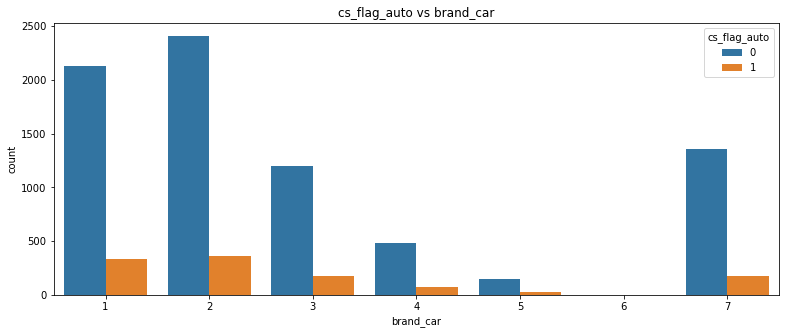

In [ ]:
print(pd.crosstab(df['cs_flag_auto'],df['brand_car']))
plt.figure(figsize=(13,5))
ax=sns.countplot(x='brand_car',hue='cs_flag_auto',data=df)

ax.set(title="cs_flag_auto vs brand_car")

rural_urban      0     1
cs_flag_auto            
0             6141  1596
1              900   243


[Text(0.5, 1.0, 'cs_flag_auto vs rural_urban')]

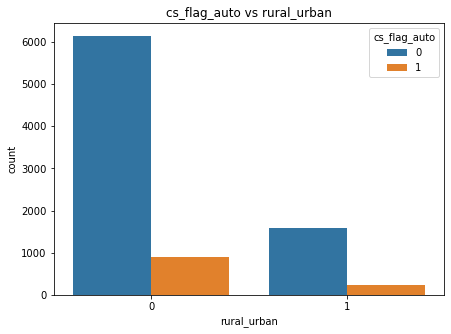

In [ ]:
print(pd.crosstab(df['cs_flag_auto'],df['rural_urban']))
plt.figure(figsize=(7,5))
ax=sns.countplot(x='rural_urban',hue='cs_flag_auto',data=df)

ax.set(title="cs_flag_auto vs rural_urban")

Cars             1     2     3    4    5  6
cs_flag_auto                               
0             3492  2407  1204  482  151  1
1              511   363   168   77   24  0


[Text(0.5, 1.0, 'cs_flag_auto vs Cars')]

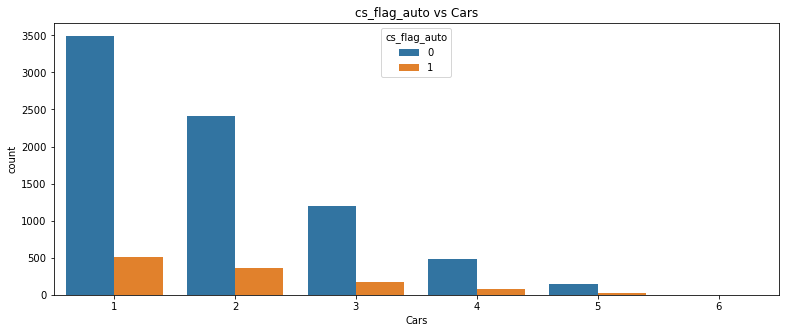

In [ ]:
print(pd.crosstab(df['cs_flag_auto'],df['Cars']))
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Cars',hue='cs_flag_auto',data=df)

ax.set(title="cs_flag_auto vs Cars")

# Anova Test

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
 model = ols('cs_flag_auto~brand_car+Cars+FA_DCT+Fc+FD+zone+rural_urban', data=df).fit()
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           cs_flag_auto   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8455
Date:                Sun, 24 Apr 2022   Prob (F-statistic):              0.549
Time:                        14:22:17   Log-Likelihood:                -2882.8
No. Observations:                8880   AIC:                             5782.
Df Residuals:                    8872   BIC:                             5838.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1163      0.015      7.655      0.000       0.087       0.146
brand_car      -0.0027      0.002     -1.593      0.111      -0.006       0.001
Cars            0.0010      0.004      0.281      0.779      -0.006       0.008
FA_DCT         -0.0017      0.009     -0.198      0.843      -0.019       0.015
Fc              0.0009      0.003      0.307      0.759      -0.005       0.006
FD              0.0040      0.003      1.401      0.161      -0.002       0.010
zone            0.0021      0.002      0.925      0.355      -0.002       0.007
rural_urban     0.0046      0.009      0.520      0.603      -0.013       0.022
==============================================================================
Omnibus:                     3551.864   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10401.625
Skew:                           2.215   Prob(JB):                         0.00
Kurtosis:                       5.913   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# chi-square test

The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset. That is, it defines the correlation amongst the grouping categorical data.

Using the Chi-square test, we can estimate the level of correlation i.e. association between the categorical variables of the dataset. This helps us analyze the dependence of one category of the variable on the other independent category of the variable.

In [ ]:
from scipy.stats import chi2_contingency 
import numpy as np
chisqt = pd.crosstab(df.zone, df.brand_car, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3]) 

(6.490459570587847, 0.1653925009684403, 4)


 0.1653 is the p-value, 6.4904 is the statistical value and 4 is the degree of freedom.
As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the 
variables ‘zone’ and ‘brand_car’ are  independent of each other.

In [ ]:
from scipy.stats import chi2_contingency 
import numpy as np
chisqt = pd.crosstab(df.cs_flag_auto, df.zone, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3]) 

(16.301384150346063, 0.002640300448326735, 4)


0.0026 is the p-value, 16.301 is the statistical value and 4 is the degree of freedom.
As the p-value is less than 0.05, we accept reject the NULL hypothesis and assume that the 
variables ‘cs_flag_auto’ and ‘zone’ are  not independent of each other.

In [ ]:
df.columns

Index(['houshold', 'brand_car', 'age_car_yr', 'Sum_Totprem_Auto', 'Cars',
       'salard_Age_cus_HH', 'cus_tenure_mth', 'HH_tenure_mth', 'FA_DCT', 'Fc',
       'FD', 'cs_flag_auto', 'zone', 'salary', 'rural_urban', 'fraud_Ind'],
      dtype='object')

In [ ]:
from bioinfokit.analys import stat, get_data

In [ ]:
res = stat()
res.chisq(df=df)

# output
print(res.summary)


Chi-squared test for independence

Test                Df    Chi-square    P-value
--------------  ------  ------------  ---------
Pearson         133185   7.7886e+08           0
Log-likelihood  133185   2.75243e+08          0



# Model formation -Logistic Regression


Sampling of the dataset Having loaded the dataset, let us now split the dataset into training and
testing dataset using the train_test_split() function.

In [ ]:
from sklearn.model_selection import train_test_split 
X = df.drop(['cs_flag_auto'],axis=1) 
Y = df['cs_flag_auto'].astype(str)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

Defining Error metrics for the model
Now, before moving towards the model building, let us define the error metrics which would help us analyze the model
in a better manner.

In [ ]:
def err_metric(CM): 
     
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    precision =(TP)/(TP+FP)
    accuracy_model  =(TP+TN)/(TP+TN+FP+FN)
    recall_score  =(TP)/(TP+FN)
    specificity_value =(TN)/(TN + FP)
     
    False_positive_rate =(FP)/(FP+TN)
    False_negative_rate =(FN)/(FN+TP)
 
    f1_score =2*(( precision * recall_score)/( precision + recall_score))
 
    print("Precision value of the model: ",precision)
    print("Accuracy of the model: ",accuracy_model)
    print("Recall value of the model: ",recall_score)
    print("Specificity of the model: ",specificity_value)
    print("False Positive rate of the model: ",False_positive_rate)
    print("False Negative rate of the model: ",False_negative_rate)
    print("f1 score of the model: ",f1_score)

Apply the model on the dataset Now it’s finally the time to perform model building on the datasets

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit= LogisticRegression(class_weight='balanced' , random_state=0).fit(X_train,Y_train)
target = logit.predict(X_test)
CM_logit = pd.crosstab(Y_test,target)
err_metric(CM_logit)

Precision value of the model:  1.0
Accuracy of the model:  0.9966216216216216
Recall value of the model:  0.975609756097561
Specificity of the model:  1.0
False Positive rate of the model:  0.0
False Negative rate of the model:  0.024390243902439025
f1 score of the model:  0.9876543209876543


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[2314    0]
 [   9  341]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2314
           1       1.00      0.97      0.99       350

    accuracy                           1.00      2664
   macro avg       1.00      0.99      0.99      2664
weighted avg       1.00      1.00      1.00      2664



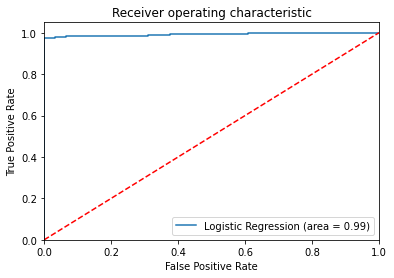

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

From Above,we observe that logistic Regression model is not suitable for motor insurance dataset so we check next model.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('D2C_pull2.xlsx - D2C_pull2.csv')

In [ ]:
data.head()

,houshold,brand_car,age_car_yr,Sum_Totprem_Auto,Cars,salard_Age_cus_HH,cus_tenure_mth,HH_tenure_mth,FA_DCT,Fc,FD,cs_flag_auto,zone,salary,rural_urban,fraud_Ind
0,1,1,13,0.0,1,49,142,189,0,2,3,0,4,2693216,0,0
1,2,7,3,0.0,4,26,211,161,1,2,4,0,2,4384950,0,0
2,3,3,2,0.0,1,42,314,329,0,1,2,0,4,3089138,1,0
3,4,2,10,0.0,2,51,47,97,1,1,3,0,4,4295953,1,0
4,5,1,34,0.0,2,26,119,109,0,2,3,0,4,1317179,0,0


In [ ]:
data.columns

Index(['houshold', 'brand_car', 'age_car_yr', 'Sum_Totprem_Auto', 'Cars',
       'salard_Age_cus_HH', 'cus_tenure_mth', 'HH_tenure_mth', 'FA_DCT', 'Fc',
       'FD', 'cs_flag_auto', 'zone', 'salary', 'rural_urban', 'fraud_Ind'],
      dtype='object')

In [ ]:
X1 = data.drop(['cs_flag_auto'], axis=1)

y1 = df['cs_flag_auto']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X1_train.shape, X1_test.shape

((6216, 15), (2664, 15))

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y1_pred_gini = clf_gini.predict(X1_test)

# Check accuracy with Gini index

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y1_test, y1_pred_gini)))

Model accuracy score with criterion gini index: 0.9981


In [ ]:
# For test data
y1_pred_train_gini = clf_gini.predict(X1_train)

y1_pred_train_gini

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y1_train, y1_pred_train_gini)))

Training-set accuracy score: 0.9981


# SVM classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data2 = pd.read_csv('D2C_pull2.xlsx - D2C_pull2.csv')

In [ ]:
X2 = data2.drop(['cs_flag_auto'], axis=1)

y2 = data2['cs_flag_auto']

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 
# fit classifier to training set
linear_svc.fit(X2_train,y2_train)
# make predictions on test set
y2_pred_test=linear_svc.predict(X2_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y2_test, y2_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9959


# Compare the train-set and test-set accuracy with overfitting

In [ ]:
y2_pred_train = linear_svc.predict(X2_train)

y2_pred_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y2_train, y2_pred_train)))

Training-set accuracy score: 0.9942


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X2_train, y2_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X2_test, y2_test)))

Training set score: 0.9942
Test set score: 0.9959


The training-set accuracy score is  0.9942 while the test-set accuracy to be  0.9959. 
These two values are quite comparable. So, there is no question of overfitting.

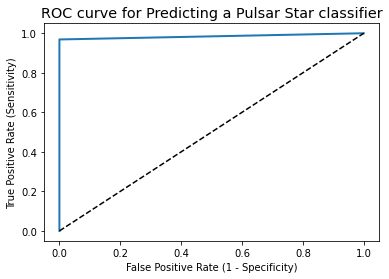

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y2_test, y2_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Random Forest

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data3 = pd.read_csv('D2C_pull2.xlsx - D2C_pull2.csv')

In [ ]:
data3.head()

,houshold,brand_car,age_car_yr,Sum_Totprem_Auto,Cars,salard_Age_cus_HH,cus_tenure_mth,HH_tenure_mth,FA_DCT,Fc,FD,cs_flag_auto,zone,salary,rural_urban,fraud_Ind
0,1,1,13,0.0,1,49,142,189,0,2,3,0,4,2693216,0,0
1,2,7,3,0.0,4,26,211,161,1,2,4,0,2,4384950,0,0
2,3,3,2,0.0,1,42,314,329,0,1,2,0,4,3089138,1,0
3,4,2,10,0.0,2,51,47,97,1,1,3,0,4,4295953,1,0
4,5,1,34,0.0,2,26,119,109,0,2,3,0,4,1317179,0,0


In [ ]:
X3 = data3.drop(['cs_flag_auto'], axis=1)

y3 = data3['cs_flag_auto']

In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.3,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=10)
random_forest_model.fit(X3_train,y3_train.ravel())
prediction=random_forest_model.predict(X3_test)

In [ ]:
# Accuracy of model 
from sklearn import metrics 
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y3_test, prediction)))

Accuracy = 0.995


# KNN

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data4 = pd.read_csv('D2C_pull2.xlsx - D2C_pull2.csv')

In [ ]:
data4.head()

,houshold,brand_car,age_car_yr,Sum_Totprem_Auto,Cars,salard_Age_cus_HH,cus_tenure_mth,HH_tenure_mth,FA_DCT,Fc,FD,cs_flag_auto,zone,salary,rural_urban,fraud_Ind
0,1,1,13,0.0,1,49,142,189,0,2,3,0,4,2693216,0,0
1,2,7,3,0.0,4,26,211,161,1,2,4,0,2,4384950,0,0
2,3,3,2,0.0,1,42,314,329,0,1,2,0,4,3089138,1,0
3,4,2,10,0.0,2,51,47,97,1,1,3,0,4,4295953,1,0
4,5,1,34,0.0,2,26,119,109,0,2,3,0,4,1317179,0,0


In [ ]:
X4 = data4.drop(['cs_flag_auto'], axis=1)

y4 = data4['cs_flag_auto']

In [ ]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.25, random_state = 0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X4_train = sc.fit_transform(X4_train)
X4_test = sc.transform(X4_test) #avoid data leakage

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X4_train, y4_train)

KNeighborsClassifier()

In [ ]:
y4_pred = classifier.predict(X4_test)

In [ ]:
predictions=model.predict(X4_test)#our model's predictions

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y4_test, y4_pred)

accuracy_score(y4_test, y4_pred)

0.9234234234234234